# ***Deep Learning - CNN - AlexNet Architecture***

# ***Mounting Google Drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ***Imports***

In [2]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("../"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import initializers
from keras.preprocessing.image import ImageDataGenerator, load_img

['bin', 'home', 'boot', 'dev', 'lib64', 'usr', 'tmp', 'media', 'root', 'mnt', 'var', 'run', 'etc', 'srv', 'proc', 'opt', 'sys', 'sbin', 'lib', 'content', '.dockerenv', 'datalab', 'tools', 'swift', 'dlib-19.18.0-cp36-cp36m-linux_x86_64.whl', 'dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl', 'tensorflow-1.15.2', 'lib32']


Using TensorFlow backend.


# ***Setting up Data Folders***

In [3]:
import zipfile
import os

content_location = '/content/'
pneumonia_zipfile_location = '/content/drive/My Drive/data/chest-xray-pneumonia.zip'
covid_zipfile_location = '/content/drive/My Drive/data/covid-chest-xray.zip'

with zipfile.ZipFile(pneumonia_zipfile_location, 'r') as zip_ref:
    zip_ref.extractall(content_location+'/data/')
print(os.listdir(content_location+'/data/'))

with zipfile.ZipFile(covid_zipfile_location, 'r') as zip_ref:
    zip_ref.extractall(content_location+'/data/')
print(os.listdir(content_location+'/data/'))

['chest_xray']
['images', 'metadata.csv', 'chest_xray']


In [4]:
mainDIR = os.listdir('/content/data/chest_xray/')
print(mainDIR)

['chest_xray', 'train', 'test', 'val', '__MACOSX']


In [0]:
train_folder= '/content/data/chest_xray/train/'
val_folder = '/content/data/chest_xray/val/'
test_folder = '/content/data/chest_xray/test/'

In [0]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# ALEX NET
import os
from shutil import copyfile
os.makedirs('images/NORMAL', exist_ok=True)
os.makedirs('images/PNEUMONIA', exist_ok=True)

base_path = '/content/data/chest_xray/'

for path in ['/train', '/test', '/val']:
    print(path)
    for dirname, _, filenames in os.walk(base_path + path):
        # print(dirname)
        # print(filenames)
        for i, file in enumerate(filenames):
            # print(i)
            # print(file)
            img_class = dirname.split('/')[6]
            copyfile(os.path.join(dirname, file), 'images/' + img_class + '/' + file)

/train
/test
/val


In [8]:
# ALEX NET

for dirname, _, filenames in os.walk('images'):
    if(len(dirname.split("/")) > 1):
        print(dirname + " has " + str(len(filenames)) + " files")

images/PNEUMONIA has 4273 files
images/NORMAL has 1583 files


In [0]:
# ALEX NET

import numpy as np
from sklearn.model_selection import train_test_split
from shutil import rmtree

#rmtree('train') # Remove existing, if re-run
#rmtree('test') # Remove existing, if re-run

os.makedirs('train/NORMAL', exist_ok=True)
os.makedirs('train/PNEUMONIA', exist_ok=True)
os.makedirs('test/NORMAL', exist_ok=True)
os.makedirs('test/PNEUMONIA', exist_ok=True)

# Split NORMAL
train, test = train_test_split(os.listdir('images/NORMAL'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('train/NORMAL/', img))
for img in test:
    copyfile(os.path.join('images/NORMAL/', img), 
             os.path.join('test/NORMAL/', img))

# Split PNEUMONIA
train, test = train_test_split(os.listdir('images/PNEUMONIA'), 
                               test_size=0.2, 
                               random_state=42)
for img in train:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('train/PNEUMONIA/', img))
for img in test:
    copyfile(os.path.join('images/PNEUMONIA/', img), 
             os.path.join('test/PNEUMONIA/', img))

# ***Viewing some images***

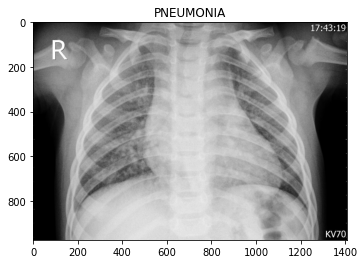

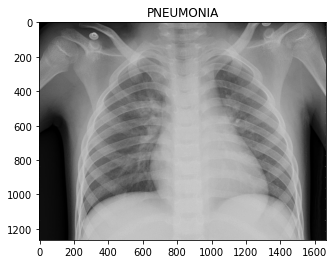

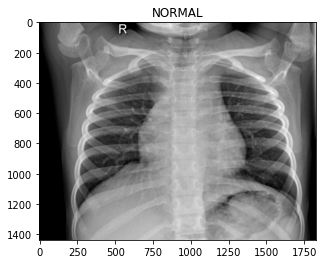

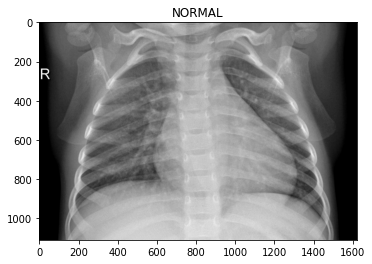

In [10]:
# ALEX NET

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

for dirname, _, filenames in os.walk('train'):
    for i, file in enumerate(filenames):
        if(i > 1):
            break
        plt.imshow(mpimg.imread(os.path.join(dirname, file)), cmap='gray')
        plt.title(dirname.split('/')[1])
        plt.show()

# ***Setting up data for model***

In [20]:
# ALEX NET

from tensorflow.keras.preprocessing.image import ImageDataGenerator

SIZE = 224
BATCH = 64

# image augmentations
image_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=5,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                validation_split=0.2)

# flow_from_directory generators
train_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='training')

validation_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='validation')

test_set = image_gen\
    .flow_from_directory('test',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH,
                        subset='validation')

Found 3748 images belonging to 2 classes.
Found 936 images belonging to 2 classes.
Found 234 images belonging to 2 classes.


# ***Compile AlexNet model***

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.add(Dense(activation = 'sigmoid', units = 1))

# model.summary()

# Compile the model
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_64 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_65 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 6, 6, 384)        

# ***Training Model***

In [39]:
model_history = model.fit(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n/BATCH,
                            validation_steps=validation_generator.n/BATCH,
                            epochs=15)

Epoch 1/15
59/58 [==============================] - 632s 11s/step - loss: 0.6013 - accuracy: 0.7150 - val_loss: 0.5983 - val_accuracy: 0.7297
Epoch 2/15
59/58 [==============================] - 624s 11s/step - loss: 0.5927 - accuracy: 0.7297 - val_loss: 0.6306 - val_accuracy: 0.7297
Epoch 3/15
59/58 [==============================] - 623s 11s/step - loss: 0.5888 - accuracy: 0.7297 - val_loss: 0.6310 - val_accuracy: 0.7297
Epoch 4/15
59/58 [==============================] - 623s 11s/step - loss: 0.5864 - accuracy: 0.7297 - val_loss: 0.5047 - val_accuracy: 0.7297
Epoch 5/15
59/58 [==============================] - 627s 11s/step - loss: 0.5855 - accuracy: 0.7297 - val_loss: 0.6552 - val_accuracy: 0.7297
Epoch 6/15
59/58 [==============================] - 625s 11s/step - loss: 0.5838 - accuracy: 0.7297 - val_loss: 0.5654 - val_accuracy: 0.7297
Epoch 7/15
59/58 [==============================] - 624s 11s/step - loss: 0.5846 - accuracy: 0.7297 - val_loss: 0.4004 - val_accuracy: 0.7297
Epoch 

# ***Printing Accuracy and Plot Training Metrics***

In [0]:
test_accu = model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 72.87199999999999 %


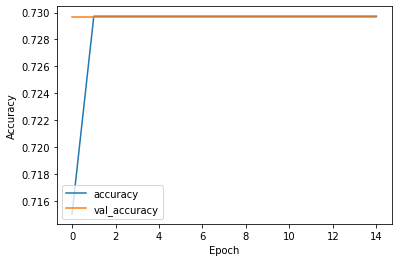

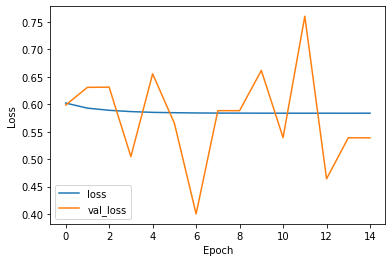

In [41]:
# Evaluate the model

# Accuracy

plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()

# Loss
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower left')
plt.show()
